# TITANIC dataset EDA

    

In [1]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline
#%matplotlib notebook
df = pd.read_csv('titanic_data.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C



##         First thing, we handle the missing values. We can see that the cabin numbers belong to a bigger section - similar to trains (C123 where C - is the section, 123 is the seat number).

<AxesSubplot:>

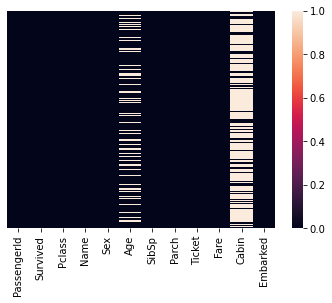

In [2]:
sb.heatmap(df.isna(),yticklabels=False)

In [3]:
df.corr(method='spearman')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.034091,0.041010,-0.061161,0.001235,-0.013975
Survived,-0.005007,1.000000,-0.339668,-0.052565,0.088879,0.138266,0.323736
Pclass,-0.034091,-0.339668,1.000000,-0.361666,-0.043019,-0.022801,-0.688032
Age,0.041010,-0.052565,-0.361666,1.000000,-0.182061,-0.254212,0.135051
SibSp,-0.061161,0.088879,-0.043019,-0.182061,1.000000,0.450014,0.447113
Parch,0.001235,0.138266,-0.022801,-0.254212,0.450014,1.000000,0.410074
Fare,-0.013975,0.323736,-0.688032,0.135051,0.447113,0.410074,1.000000


In [4]:
df['Parch'].sort_values().value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

## Let's see how the Cabin numbers look like

In [5]:
pd.unique(df['Cabin'].sort_values())

array(['A10', 'A14', 'A16', 'A19', 'A20', 'A23', 'A24', 'A26', 'A31',
       'A32', 'A34', 'A36', 'A5', 'A6', 'A7', 'B101', 'B102', 'B18',
       'B19', 'B20', 'B22', 'B28', 'B3', 'B30', 'B35', 'B37', 'B38',
       'B39', 'B4', 'B41', 'B42', 'B49', 'B5', 'B50', 'B51 B53 B55',
       'B57 B59 B63 B66', 'B58 B60', 'B69', 'B71', 'B73', 'B77', 'B78',
       'B79', 'B80', 'B82 B84', 'B86', 'B94', 'B96 B98', 'C101', 'C103',
       'C104', 'C106', 'C110', 'C111', 'C118', 'C123', 'C124', 'C125',
       'C126', 'C128', 'C148', 'C2', 'C22 C26', 'C23 C25 C27', 'C30',
       'C32', 'C45', 'C46', 'C47', 'C49', 'C50', 'C52', 'C54', 'C62 C64',
       'C65', 'C68', 'C7', 'C70', 'C78', 'C82', 'C83', 'C85', 'C86',
       'C87', 'C90', 'C91', 'C92', 'C93', 'C95', 'C99', 'D', 'D10 D12',
       'D11', 'D15', 'D17', 'D19', 'D20', 'D21', 'D26', 'D28', 'D30',
       'D33', 'D35', 'D36', 'D37', 'D45', 'D46', 'D47', 'D48', 'D49',
       'D50', 'D56', 'D6', 'D7', 'D9', 'E10', 'E101', 'E12', 'E121',
       'E17',

## For a better view, we will remove the seat number

In [6]:
# Remove seat number from cabin values so that we only have the corresponding deck of the ship
df['Cabin'] = df['Cabin'].apply(lambda x: str(x)[0] if pd.notna(x) else x)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df[df['Cabin'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## Good!
Now we can plot some graphs to find some correlation

<AxesSubplot:xlabel='Cabin', ylabel='count'>

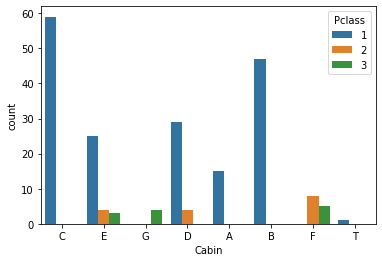

In [8]:
sb.countplot(x='Cabin',hue='Pclass',data=df)

## From the graph above we can tell the following:
    - Pclass = 1 exists in the decks C, E, D, A, B, T
    - Pclass = 2 - exists in the decks E, D, F
    - Pclass = 3 exists in the decks E, G, F
        First thing we can tell, is that the person classes are probably placed on horizontal layers, because most of the decks contain all three classes. 
We can see that most of the not-nan cabins are from Pclass = 1 so, my assumption is that most of the cabins nan values are are contained in Pclass 2 and 3, but let's verify.

<AxesSubplot:xlabel='Cabin', ylabel='count'>

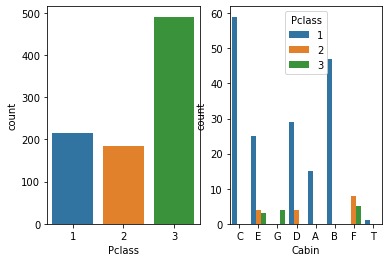

In [9]:
plt.subplot(1,2,1)
sb.countplot(x='Pclass', data=df)
plt.subplot(1,2,2)
sb.countplot(x='Cabin',hue='Pclass',data=df)

In the graph above we can see that around 170 of the 216 seats at Pclass 1 are not nan values.

In [10]:
print(df['Pclass'].value_counts())
print(df['Cabin'].value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

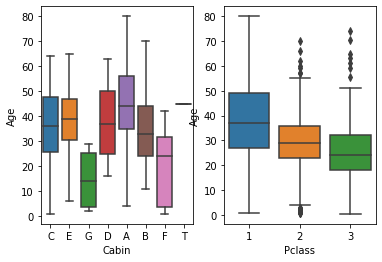

In [11]:
fig, ax = plt.subplots(1,2)
sb.boxplot(x='Cabin', y='Age',data=df, ax=ax[0])
sb.boxplot(x='Pclass', y='Age',data=df, ax=ax[1])

Handle the nan ages with respect to Pclass mean

In [12]:
mean_age_dict = {'1':36,'2':29,'3':24}

def age_func(data):
    pclass = data[0]
    age = data[1]
    if pd.isna(age):
        return (mean_age_dict[str(pclass)])
    else:
        return age
    
df['Age'] = df[['Pclass','Age','Cabin']].apply(age_func,axis=1)    


The seat distribution was probably random, taken into account that probably every cabin has all three pclasses. On the other hand, pclass with age were correlated because generally younger people travel at lower classes (probably because they have less money and lower needs). Also, people from all cabins have survived.

In [13]:
#check how many nan Cabins are with respect to Pclass
df.loc[df['Age'].isna(),'Pclass'].value_counts()

Series([], Name: Pclass, dtype: int64)

In [14]:
#Now we handle the cabins - just for fun. We also transofrm deck label to numbers
cab_uni = pd.unique(df['Cabin'].sort_values())
cab_uni = list(cab_uni[:-1])


def cabin_func(data):
    cabin = data[0]
    if pd.isna(cabin):
        return cab_uni.index(random.choice(cab_uni)) +1
    else:
        return cab_uni.index(cabin) +1

df['Cabin'] = df[['Cabin']].apply(cabin_func,axis=1)

In [15]:
cab_uni.index('C')+1

3

<AxesSubplot:xlabel='Cabin', ylabel='count'>

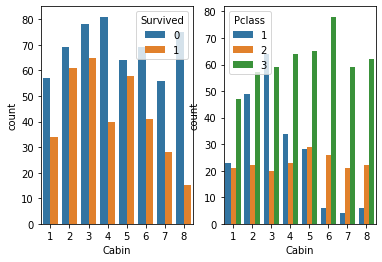

In [16]:
plt.subplot(1,2,1)
sb.countplot(x='Cabin',data=df,hue='Survived')
plt.subplot(1,2,2)
sb.countplot(x='Cabin',hue='Pclass',data=df.dropna())

<AxesSubplot:>

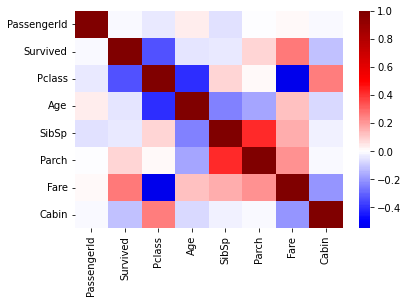

In [17]:
sb.heatmap(df.corr(),cmap='seismic',center=0)

Now Cabin has appeared! :)

<AxesSubplot:xlabel='Cabin', ylabel='count'>

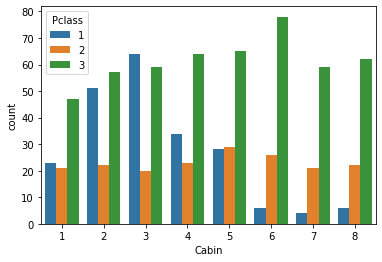

In [18]:
sb.countplot(x='Cabin',data=df,hue='Pclass')

<AxesSubplot:xlabel='Cabin', ylabel='count'>

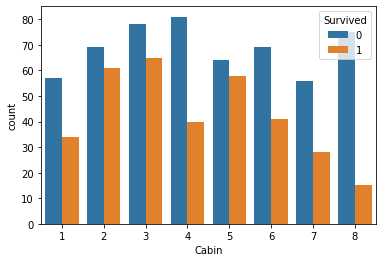

In [19]:
sb.countplot(x='Cabin',data=df,hue='Survived')

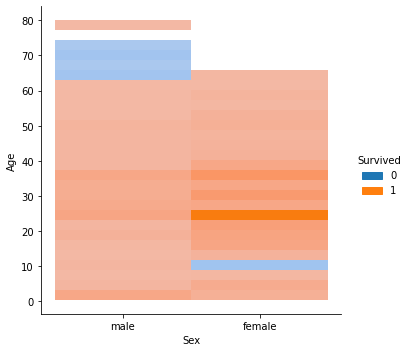

In [20]:
sb.displot(x='Sex',y='Age',data=df, hue='Survived')

Very interesting fact: only some very old men and some very young women died

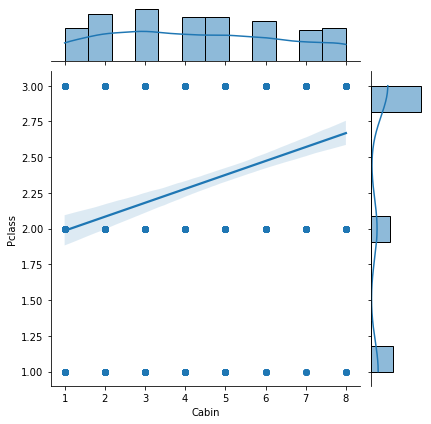

In [21]:
sb.jointplot(x='Cabin',y='Pclass',data=df,kind='reg')

UUUU, some correlation

In [22]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.032738,0.523008,0.381594,32.204208,4.312009
std,257.353842,0.486592,0.836071,13.225557,1.102743,0.806057,49.693429,2.160228
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,3.000000
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,4.000000
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000,6.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,8.000000


<AxesSubplot:xlabel='Age'>

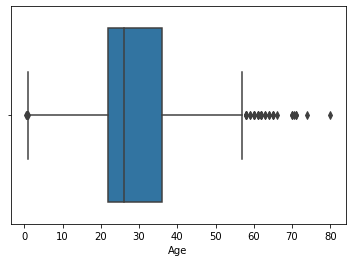

In [23]:
sb.boxplot(x='Age',data=df)

<AxesSubplot:xlabel='Age', ylabel='Count'>

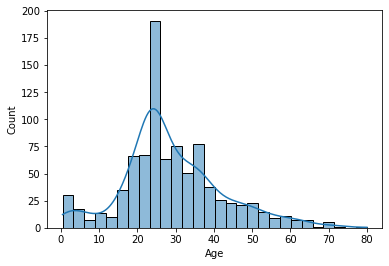

In [24]:
sb.histplot(x='Age',data=df,kde=True)

In [25]:
print(df['Age'].mean(),df['Age'].median(),df['Age'].mode())

29.03273849607183 26.0 0    24.0
Name: Age, dtype: float64


In [26]:
print((df['Age'].std())**2)

174.91534777311176


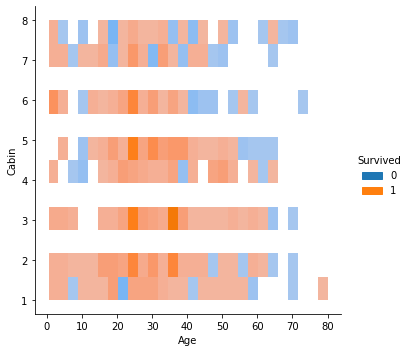

In [27]:
sb.displot(x='Age', y= 'Cabin',data=df, hue='Survived')

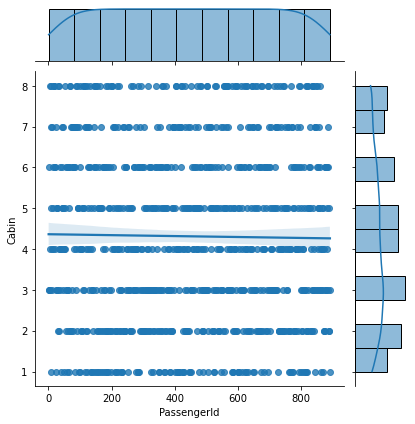

In [28]:
sb.jointplot(x='PassengerId',y='Cabin',data=df,kind='reg')

In [29]:
drop_col = ['Name','PassengerId','Ticket','Fare','Embarked']

In [30]:
df = df.drop(drop_col,axis=1)

In [31]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [32]:
#handle cathegorical data
df['Sex']=df['Sex'].apply(lambda x: 1 if x=='male' else 0)

In [33]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
0,0,3,1,22.0,1,0,3
1,1,1,0,38.0,1,0,3
2,1,3,0,26.0,0,0,6
3,1,1,0,35.0,1,0,3
4,0,3,1,35.0,0,0,8


In [34]:
y = df['Survived']
X = df.drop(columns=['Survived'],axis=1)

# Train data split using sklearn

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Logistic Regression

NOTE! We need to scale down the values because Logistic Regression uses Gradient Descent

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [37]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

LogisticRegression()

In [38]:
y_pred = regressor.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0], dtype=int64)

In [39]:
regressor.score(X_test,y_test)

0.7835820895522388

# Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
r_regressor = RandomForestClassifier(max_depth=3, random_state=100)
r_regressor.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, random_state=100)

In [41]:
y2_pred = r_regressor.predict(X_test)

In [42]:
#CHeck where did the algorithm misspredict
comp = pd.DataFrame({'real':y_test, 'pred':y2_pred})
comp.reset_index(drop=True)
print(comp[comp.real != comp.pred])

     real  pred
241     1     0
2       1     0
17      1     0
368     1     0
430     1     0
..    ...   ...
74      1     0
744     1     0
510     1     0
573     1     0
484     1     0

[64 rows x 2 columns]


## This is a very good exapmple of overfitting by extending our decision trees to full lengh.
It gives us the following: 
- low bias
- high variance

Meaning that it could perform very bad with other test data.
BUT! Random Forest converts high variance to low variance by using random sample and feature selection and majority vote.

In [43]:
r_regressor.score(X_test,y_test)

0.7611940298507462

- For the first try, we got an accuracy of 0.7611940298507462

# Hyperparameter Optimization

In [44]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint

In [61]:
est = RandomForestClassifier(n_jobs=-1)
rf_p_dist={'max_depth':[3,5,10,None],
            'n_estimators':[100,200,300,400,500],
            'max_features':randint(1,3),
            'criterion':['gini','entropy'],
            'bootstrap':[True,False],
            'min_samples_leaf':randint(1,4),
            }

In [62]:

def hypertuning_rscv(est, p_distr, nbr_iter, X, y):
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,n_jobs=-1, n_iter=nbr_iter,cv=9)

    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

In [63]:
rf_parameters, rf_ht_score = hypertuning_rscv(est,rf_p_dist, 10 ,X,y)

In [65]:
rf_parameters

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 1,
 'min_samples_leaf': 2,
 'n_estimators': 400}

In [66]:
rf_ht_score

0.8327721661054994

# Now let's create the model with the best params

In [71]:
best_calssif = RandomForestClassifier(max_depth=5,
                                        max_features=2,
                                        min_samples_leaf=1,
                                        n_estimators=500,
                                        bootstrap=True, 
                                        criterion='entropy')
                                        

In [72]:
best_calssif.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=1,
                       n_estimators=500)

In [73]:
best_calssif.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0], dtype=int64)

In [74]:
best_calssif.score(X_test,y_test)

0.7798507462686567

- Now the accuracy has increased to 0.7798507462686567